# Predicting the Condition of Tanzania Water Wells

## 1. Business Understanding

### Problem Statement

Lack of clean and potable water is a major issue in many communities across Tanzania. To address this issue, the Tanzanian Ministry of Water has installed several water wells across the country. However, not all of these wells are functioning as intended, which results in a lack of access to clean water for communities.

### Goal

The goal of this project is to build a predictive model that can accurately predict the condition of water wells in Tanzania based on data from Taarifa and the Tanzanian Ministry of Water to predict which pumps are functional, which need some repairs, and which don't work at all. 

By doing so, the aim is to improve maintenance operations and ensure that clean and potable water is available to communities across Tanzania.

### Objectives

#### Main objective:
To predict the condition of water wells in Tanzania to ensure that clean and portable water is available to communities across Tanzania. 

#### Specific Objectives:

1. To understand the problem statement and the goal of the project
2. To identify the variables that can impact the functionality of water wells
3. To determine the target variable (functional, need repairs, or non-functional)

### Metric of Success

The model will be considered a success when it achieves an accuracy and f1 score between 0.8 to 1


### Data Description

amount_tsh - Total static head (amount water available to waterpoint)

date_recorded - The date the row was entered

funder - Who funded the well

gps_height - Altitude of the well

installer - Organization that installed the well

longitude - GPS coordinate

latitude - GPS coordinate

wpt_name - Name of the waterpoint if there is one

num_private -

basin - Geographic water basin

subvillage - Geographic location

region - Geographic location

region_code - Geographic location (coded)

district_code - Geographic location (coded)

lga - Geographic location

ward - Geographic location

population - Population around the well

public_meeting - True/False

recorded_by - Group entering this row of data

scheme_management - Who operates the waterpoint

scheme_name - Who operates the waterpoint

permit - If the waterpoint is permitted

construction_year - Year the waterpoint was constructed

extraction_type - The kind of extraction the waterpoint uses

extraction_type_group - The kind of extraction the waterpoint uses

extraction_type_class - The kind of extraction the waterpoint uses

management - How the waterpoint is managed

management_group - How the waterpoint is managed

payment - What the water costs

payment_type - What the water costs

water_quality - The quality of the water

quality_group - The quality of the water

quantity - The quantity of water

quantity_group - The quantity of water

source - The source of the water

source_type - The source of the water

source_class - The source of the water

waterpoint_type - The kind of waterpoint

waterpoint_type_group - The kind of waterpoint

### Distribution of Target Column

There are three possible values:

1. functional - the waterpoint is operational and there are no repairs needed
2. functional needs repair - the waterpoint is operational, but needs repairs
3. non functional - the waterpoint is not operational

### Technique used (CRISP-DM)

1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Modeling and Evaluation
5. External Validation
6. Challenging the Solution
7. Conclusions and Recommendations


## 2. Data Understanding

### 2.1 Importing Libraries

In [1]:
# Importing necessary libraries
# Data Manipulation and Visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing and Data Transforming
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Building Machine Learning Models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV

# Performance Evaluation
from sklearn.metrics import accuracy_score, f1_score, classification_report

import warnings
warnings.filterwarnings('ignore')

### 2.2 Loading Datasets

In [2]:
# Load the training set values and training set labels
train_values = pd.read_csv('TrainingSetValues.csv')
train_labels = pd.read_csv('TrainingSetLabels.csv')
test_df = pd.read_csv('TestSetValues.csv')

# Merge the two datasets
train_df = pd.merge(train_values, train_labels, on='id')

The "TrainingSetValues.csv" file contains the feature values for each observation in the training set, while "TrainingSetLabels.csv" contains the target or label for each observation.

The two datasets are then merged on the "id" column using the "pd.merge()" function, creating a new dataset named "train_df". The merged dataset contains both the feature values and target values for each observation in the training set.

### 2.3 Exploring the Dataset

In [3]:
# Understanding the shape of the datasets
print("The train dataset has", train_df.shape[0], "rows and", train_df.shape[1], "columns.")
print("The test dataset has", test_df.shape[0], "rows and", test_df.shape[1], "columns.")


The train dataset has 59400 rows and 41 columns.
The test dataset has 14850 rows and 40 columns.


The "train_df" dataset has 59400 rows and 41 columns, while the "test_df" dataset has 14850 rows and 40 columns. This is because the test_df does not contain a target column.

In [4]:
# Understanding the first and last 5 rows of the train dataset
train_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,14/03/2011,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,06/03/2013,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,25/02/2013,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,28/01/2013,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,13/07/2011,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [5]:
train_df.tail()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
59395,60739,10.0,03/05/2013,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,27263,4700.0,07/05/2011,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,37057,0.0,11/04/2011,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,31282,0.0,08/03/2011,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional
59399,26348,0.0,23/03/2011,World Bank,191,World,38.104048,-6.747464,Kwa Mzee Lugawa,0,...,salty,salty,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional


In [6]:
# Understanding the first and last 5 rows of the test dataset
test_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [7]:
test_df.tail()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
14845,39307,0.0,2011-02-24,Danida,34,Da,38.852669,-6.582841,Kwambwezi,0,...,never pay,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
14846,18990,1000.0,2011-03-21,Hiap,0,HIAP,37.451633,-5.350428,Bonde La Mkondoa,0,...,annually,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
14847,28749,0.0,2013-03-04,NaN,1476,NaN,34.739804,-4.585587,Bwawani,0,...,never pay,soft,good,insufficient,insufficient,dam,dam,surface,communal standpipe,communal standpipe
14848,33492,0.0,2013-02-18,Germany,998,DWE,35.432732,-10.584159,Kwa John,0,...,never pay,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe
14849,68707,0.0,2013-02-13,Government Of Tanzania,481,Government,34.765054,-11.226012,Kwa Mzee Chagala,0,...,never pay,soft,good,dry,dry,spring,spring,groundwater,communal standpipe,communal standpipe


In [8]:
train_df.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

In [9]:
# Understanding the summary statistics of the dataset
train_df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [10]:
# Summary of the information 
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

There are some columns with missing values, such as funder, installer, public_meeting, and permit. The data type of the columns is also noted. For example, id, gps_height, num_private, region_code, district_code, and construction_year are of type int64. The data type of the rest of the columns is object, which can represent either categorical or string data.

### 2.4 Check for Missing Values 

In [11]:
# Understanding the number of missing values in the dataset
print("\nMissing Values in the dataset:")
print(train_df.isnull().sum().sum(), "missing values in the dataset")


Missing Values in the dataset:
46094 missing values in the dataset


In [12]:
def identify_missing_values(data):
    """A simple function to check if data has missing values"""
    # identify the total missing values per column
    # sort in order 
    miss = data.isnull().sum().sort_values(ascending = False)

    # calculate percentage of the missing values
    percentage_miss = (data.isnull().sum() / len(data)).sort_values(ascending = False)

    # store in a dataframe 
    missing = pd.DataFrame({"Missing Values": miss, "Percentage(%)": percentage_miss})

    # remove values that are missing 
    missing.drop(missing[missing["Percentage(%)"] == 0].index, inplace = True)

    return missing

missing_data = identify_missing_values(train_df)
missing_data

,Missing Values,Percentage(%)
scheme_name,28166,0.474175
scheme_management,3877,0.065269
installer,3655,0.061532
funder,3635,0.061195
public_meeting,3334,0.056128
permit,3056,0.051448
subvillage,371,0.006246


This table represents the number and percentage of missing values in different columns of the train dataset.

For each column, the first column ("Missing Values") lists the number of missing values and the second column ("Percentage(%)") lists the percentage of missing values in the column relative to the total number of cells in the column.

For example, for the "scheme_name" column, there are 28166 missing values out of the total number of cells in the column, which is equal to 0.474175 or 47.42% of the total.

### 2.5 Check for Duplicates

In [13]:
# Check for duplicates
duplicates = train_df.duplicated()
print("Number of duplicate rows:", duplicates.sum())

Number of duplicate rows: 0


There are 0 duplicate rows in the dataset. This means that all the observations in the train dataset are unique and there are no repeated observations with the same values in all columns.

## 2.7 Exploratory Data Analysis

### a) Univariate Analysis

#### Status Group (Target Variable)

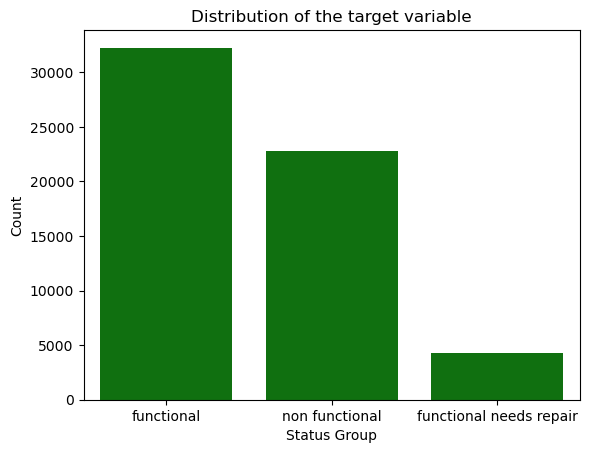

<Figure size 640x480 with 0 Axes>

In [14]:
# Plotting the distribution of the target variable
sns.countplot(x='status_group', color="green", data=train_df)
plt.title("Distribution of the target variable")
plt.xlabel("Status Group")
plt.ylabel("Count")
plt.show()
plt.savefig("Distribution of the target variable.png");

The majority class is the functional class while the minority is the functional needs repair class

This imbalance will be handled in during the "Data Preparation" phase, before building the predictive models. This is because the class imbalance can impact the performance of the predictive models, so it's important to address it before modeling. 

#### Source Class

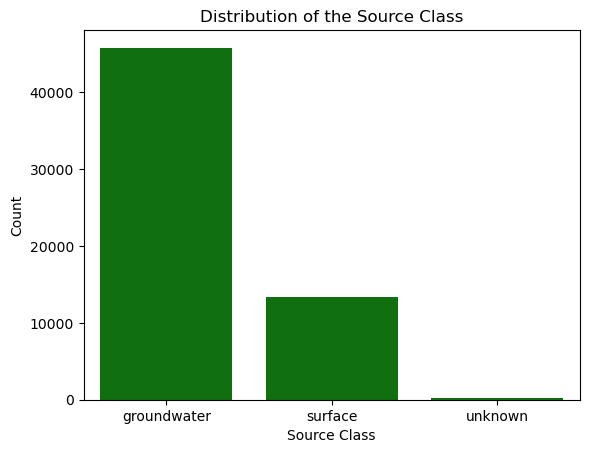

<Figure size 640x480 with 0 Axes>

In [15]:
# Plotting the distribution of the source class
sns.countplot(x='source_class', color="green", data=train_df)
plt.title("Distribution of the Source Class")
plt.xlabel("Source Class")
plt.ylabel("Count")
plt.show()

plt.savefig("Distribution of the Source Class.png");

The source of most wells is groundwater followed by surface

#### Waterpoint Type

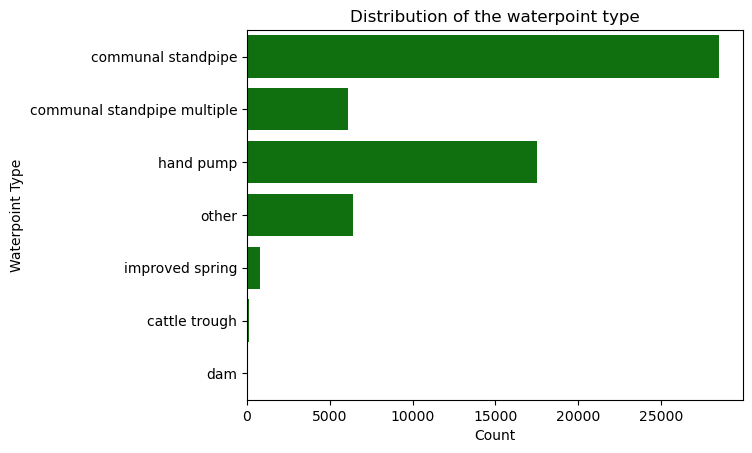

<Figure size 640x480 with 0 Axes>

In [16]:
# Plotting the distribution of the waterpoint type
sns.countplot(y='waterpoint_type', color="green", data=train_df)
plt.title("Distribution of the waterpoint type")
plt.ylabel("Waterpoint Type")
plt.xlabel("Count")
plt.show()

plt.savefig("Distribution of the waterpoint type.png");

The kind of waterpoint for most wells is the communal standpipe followed by hand pump 

#### Extraction Type

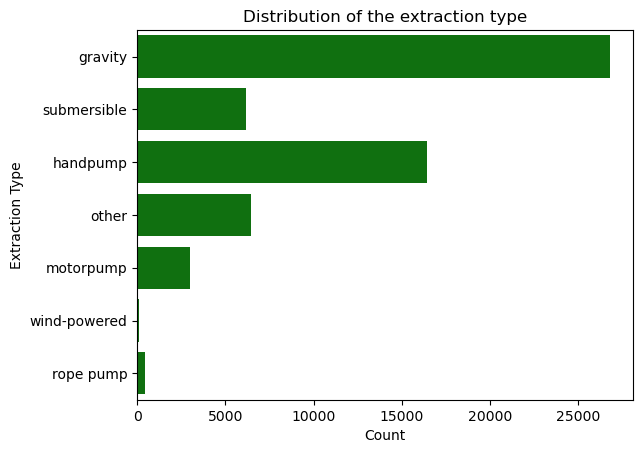

<Figure size 640x480 with 0 Axes>

In [17]:
# Plotting the distribution of the extraction type
sns.countplot(y='extraction_type_class', color="green", data=train_df)
plt.title("Distribution of the extraction type")
plt.ylabel("Extraction Type")
plt.xlabel("Count")
plt.show()

plt.savefig("Distribution of the extraction type.png");

The extraction type for most wells is through gravity

   #### Water Quality 

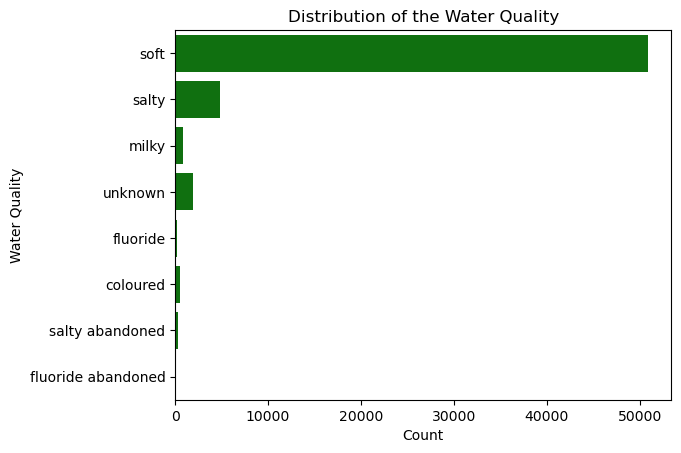

<Figure size 640x480 with 0 Axes>

In [18]:
# Plotting the distribution of the water quality
sns.countplot(y='water_quality', color="green", data=train_df)
plt.title("Distribution of the Water Quality")
plt.ylabel("Water Quality")
plt.xlabel("Count")
plt.show()

plt.savefig("Distribution of the Water Quality.png");

The quality of water for most wells is soft water followed by salty water

#### Water Quantity

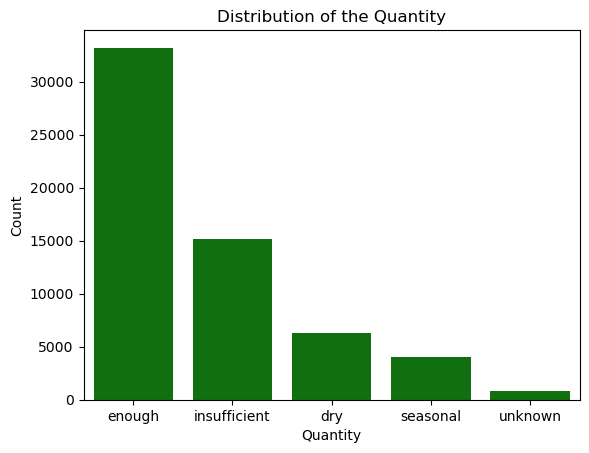

<Figure size 640x480 with 0 Axes>

In [19]:
# Plotting the distribution of the water quantity
sns.countplot(x='quantity', color="green", data=train_df)
plt.title("Distribution of the Quantity")
plt.xlabel("Quantity")
plt.ylabel("Count")
plt.show()


plt.savefig("Distribution of the Quantity.png");

The quantity of water in most wells is enough and a few are insufficient or dry

#### Management Type

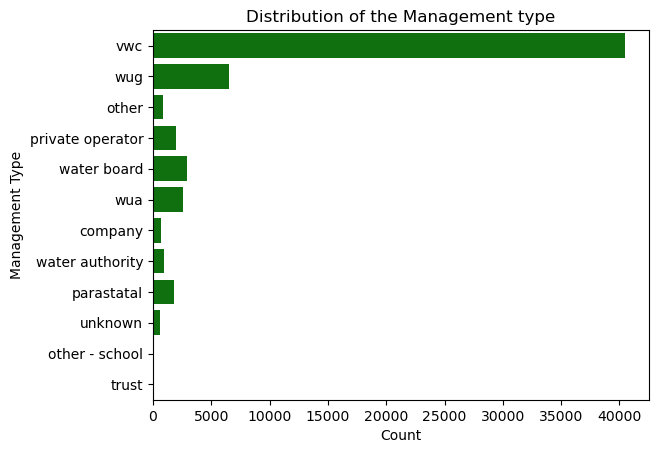

<Figure size 640x480 with 0 Axes>

In [20]:
# Plotting the distribution of the management type
sns.countplot(y='management', color="green", data=train_df)
plt.title("Distribution of the Management type")
plt.ylabel("Management Type")
plt.xlabel("Count")
plt.show()

plt.savefig("Distribution of the Management type.png");

Most waterpoints are managed by vwc

####  Payment Type

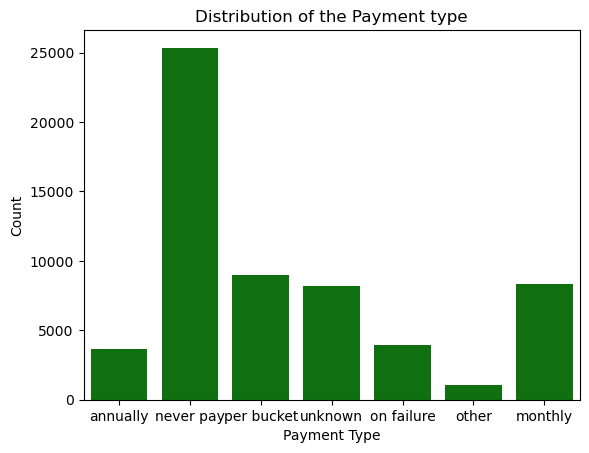

<Figure size 640x480 with 0 Axes>

In [21]:
# Plotting the distribution of the payment type
sns.countplot(x='payment_type', color="green", data=train_df)
plt.title("Distribution of the Payment type")
plt.xlabel("Payment Type")
plt.ylabel("Count")
plt.show()

plt.savefig("Distribution of the Payment type.png");

Most waterpoints are never paid for

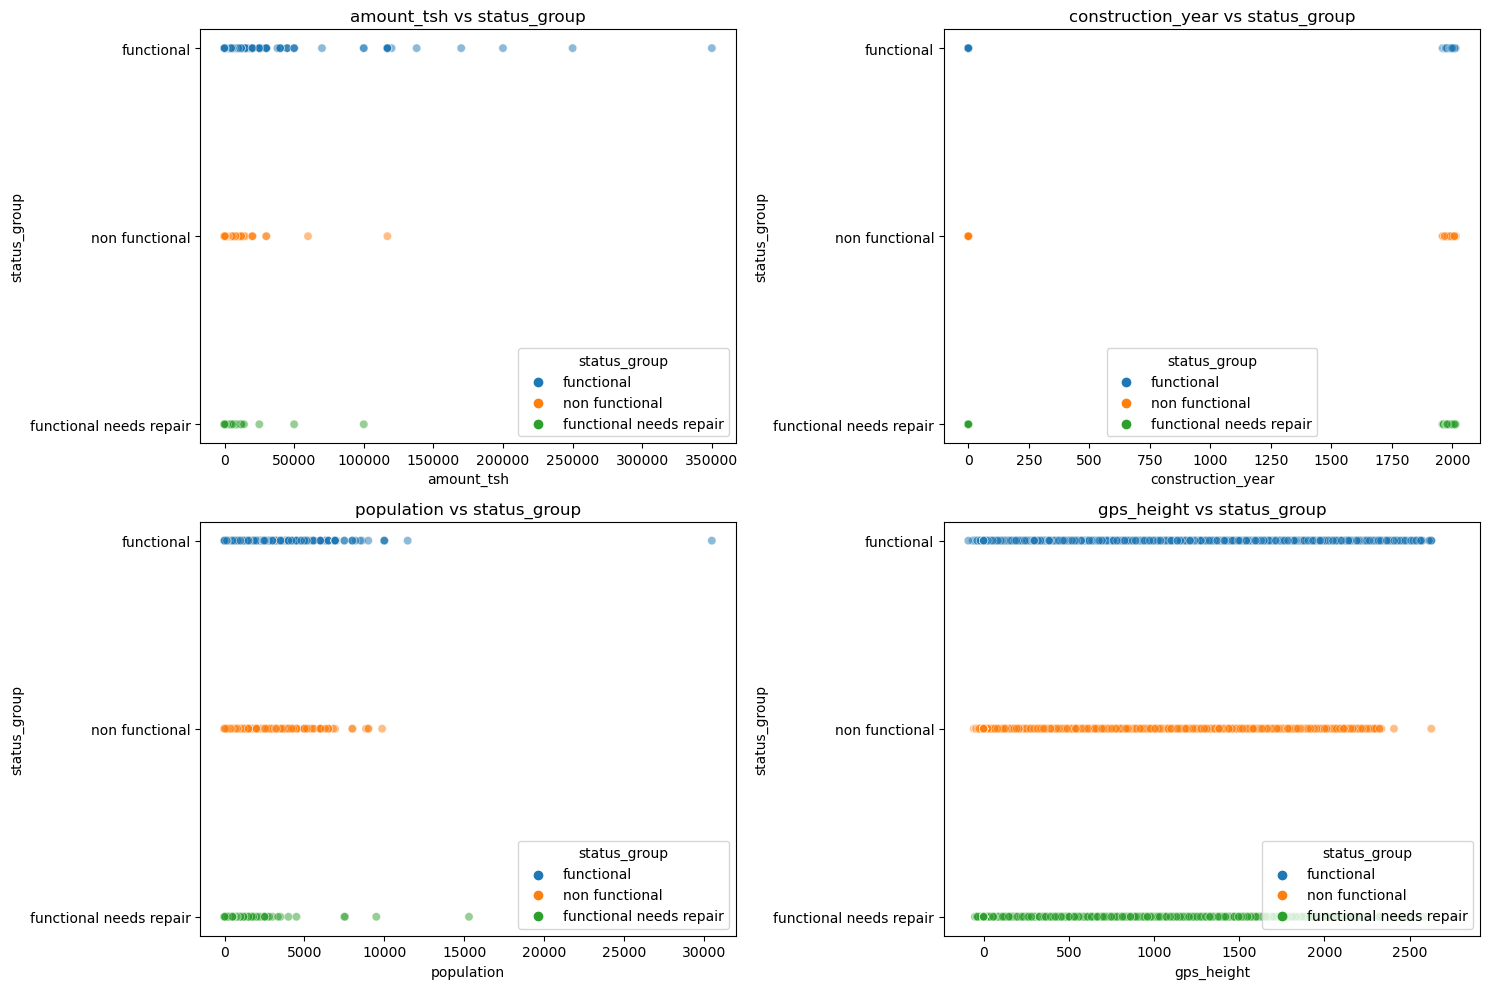

In [22]:
# Plot scatter plots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

sns.scatterplot(x="amount_tsh", y="status_group", data=train_df, ax=axs[0, 0], alpha=0.5, hue="status_group")
axs[0, 0].set_title("amount_tsh vs status_group")

sns.scatterplot(x="construction_year", y="status_group", data=train_df, ax=axs[0, 1], alpha=0.5, hue="status_group")
axs[0, 1].set_title("construction_year vs status_group")

sns.scatterplot(x="population", y="status_group", data=train_df, ax=axs[1, 0], alpha=0.5, hue="status_group")
axs[1, 0].set_title("population vs status_group")

sns.scatterplot(x="gps_height", y="status_group", data=train_df, ax=axs[1, 1], alpha=0.5, hue="status_group")
axs[1, 1].set_title("gps_height vs status_group")

plt.tight_layout()
plt.show()


   The amount of water available to the waterpoints is higher for the functional class and lowest for the non functional class
   
   The population around the well is highest for the functional class and lowest for the non functional class
   
   The gps height(altitude of the well) for most waterpoints is highest for the functional class

### b) Bivariate Analysis

In [23]:
# Drop the rows with 0 values for construction year
# Create a copy of the dataframe
train_df_copy = train_df.copy()
train_df_copy = train_df[train_df['construction_year'] != 0]

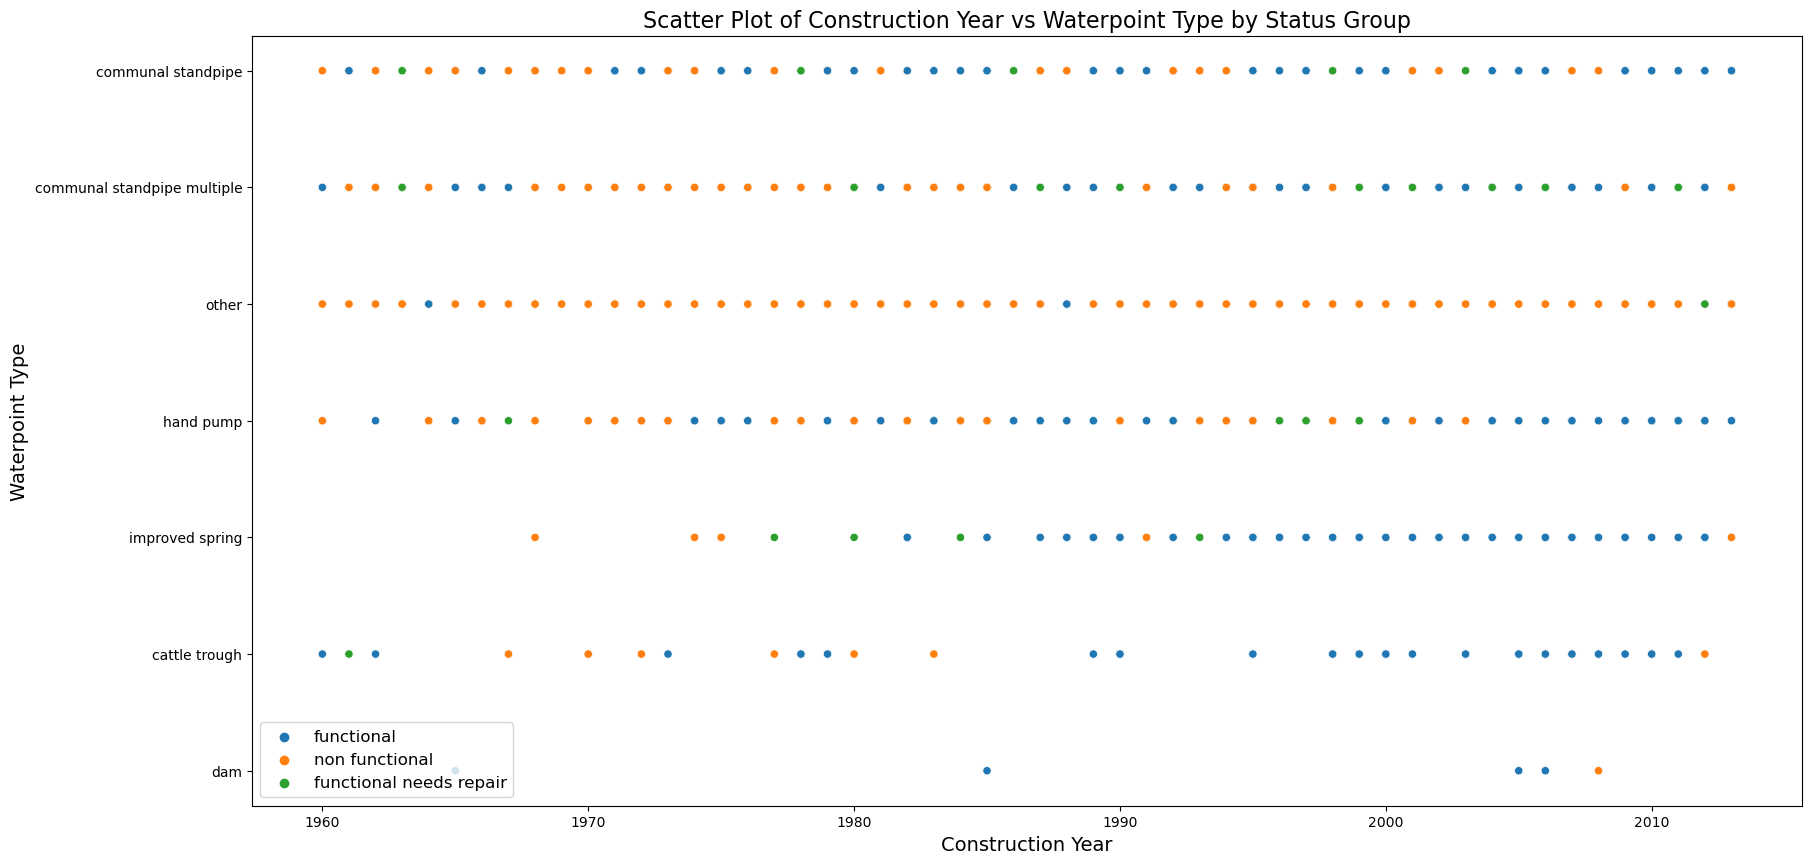

In [24]:
f, ax = plt.subplots(figsize=(20,10))
ax = sns.scatterplot(data=train_df_copy, x='construction_year', y='waterpoint_type', hue='status_group')
ax.set_xlabel('Construction Year', fontsize=14)
ax.set_ylabel('Waterpoint Type', fontsize=14)
ax.set_title('Scatter Plot of Construction Year vs Waterpoint Type by Status Group', fontsize=16)
ax.legend(fontsize=12);

f.savefig("Scatter Plot of Construction Year vs Waterpoint Type by Status Group.png");

Most funtional wells have the communal standpipe, hand pump and improved spring

The majority of non functional wells waterpoint type is classified under other

The wells that need repair are a few and their waterpoint types are scattered over all the types

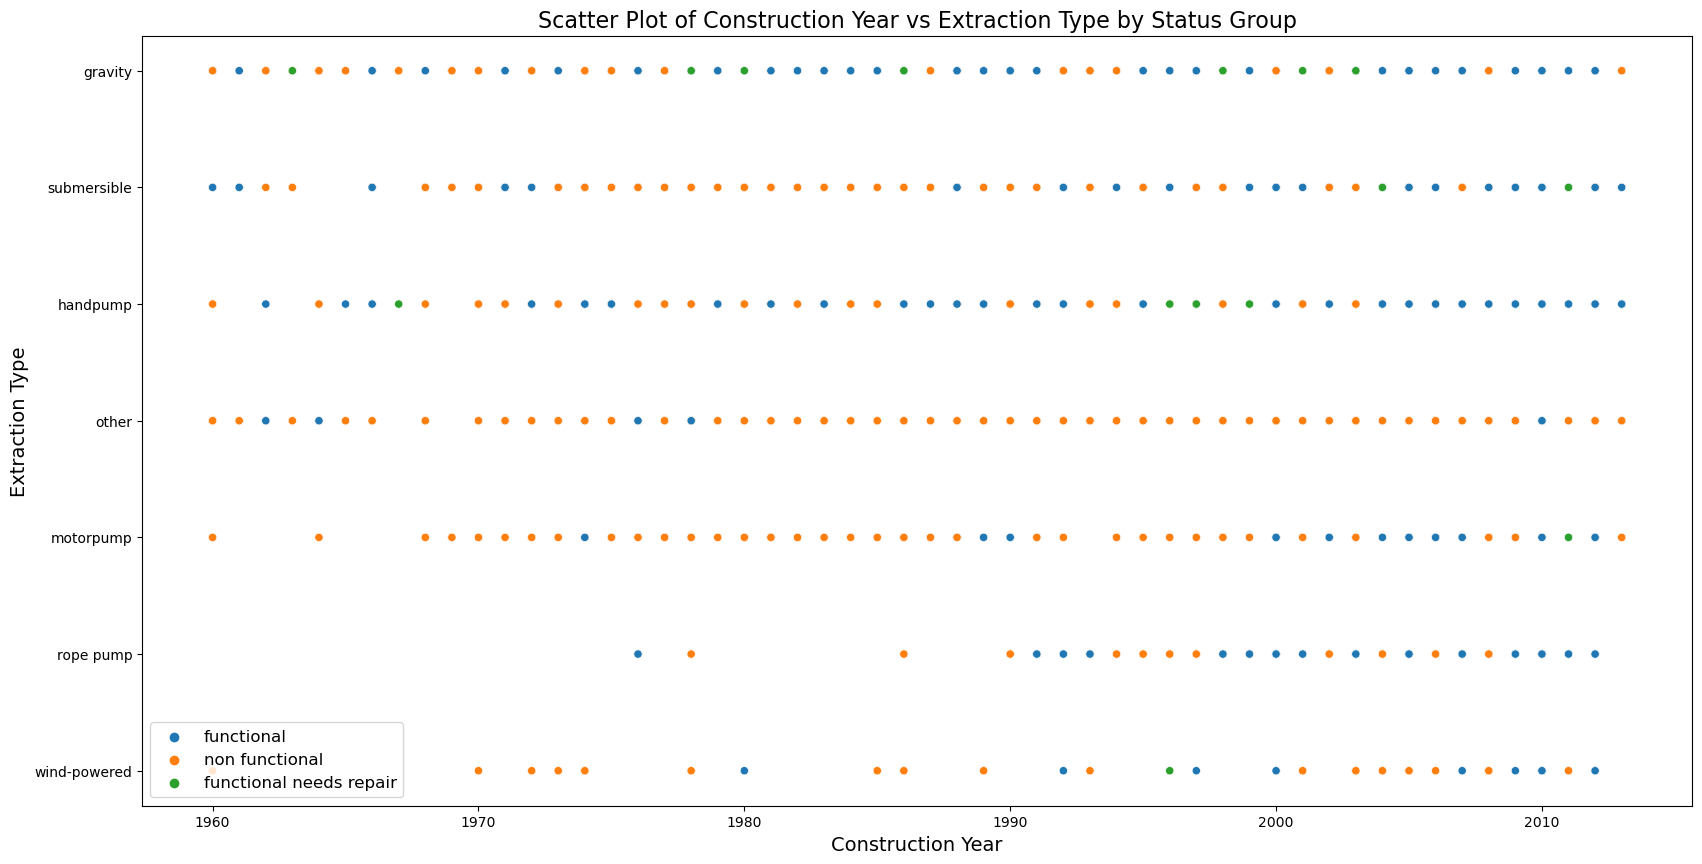

In [25]:
f, ax = plt.subplots(figsize=(20,10))
ax = sns.scatterplot(data=train_df_copy, x='construction_year', y='extraction_type_class', hue='status_group')
ax.set_xlabel('Construction Year', fontsize=14)
ax.set_ylabel('Extraction Type', fontsize=14)
ax.set_title('Scatter Plot of Construction Year vs Extraction Type by Status Group', fontsize=16)
ax.legend(fontsize=12);

f.savefig("Scatter Plot of Construction Year vs Extraction Type by Status Group.png");

The extraction type for the functional wells is mostly through gravity and handpump

The extraction type for the non functional wells is mostly through submersible, motorpumb or other methods

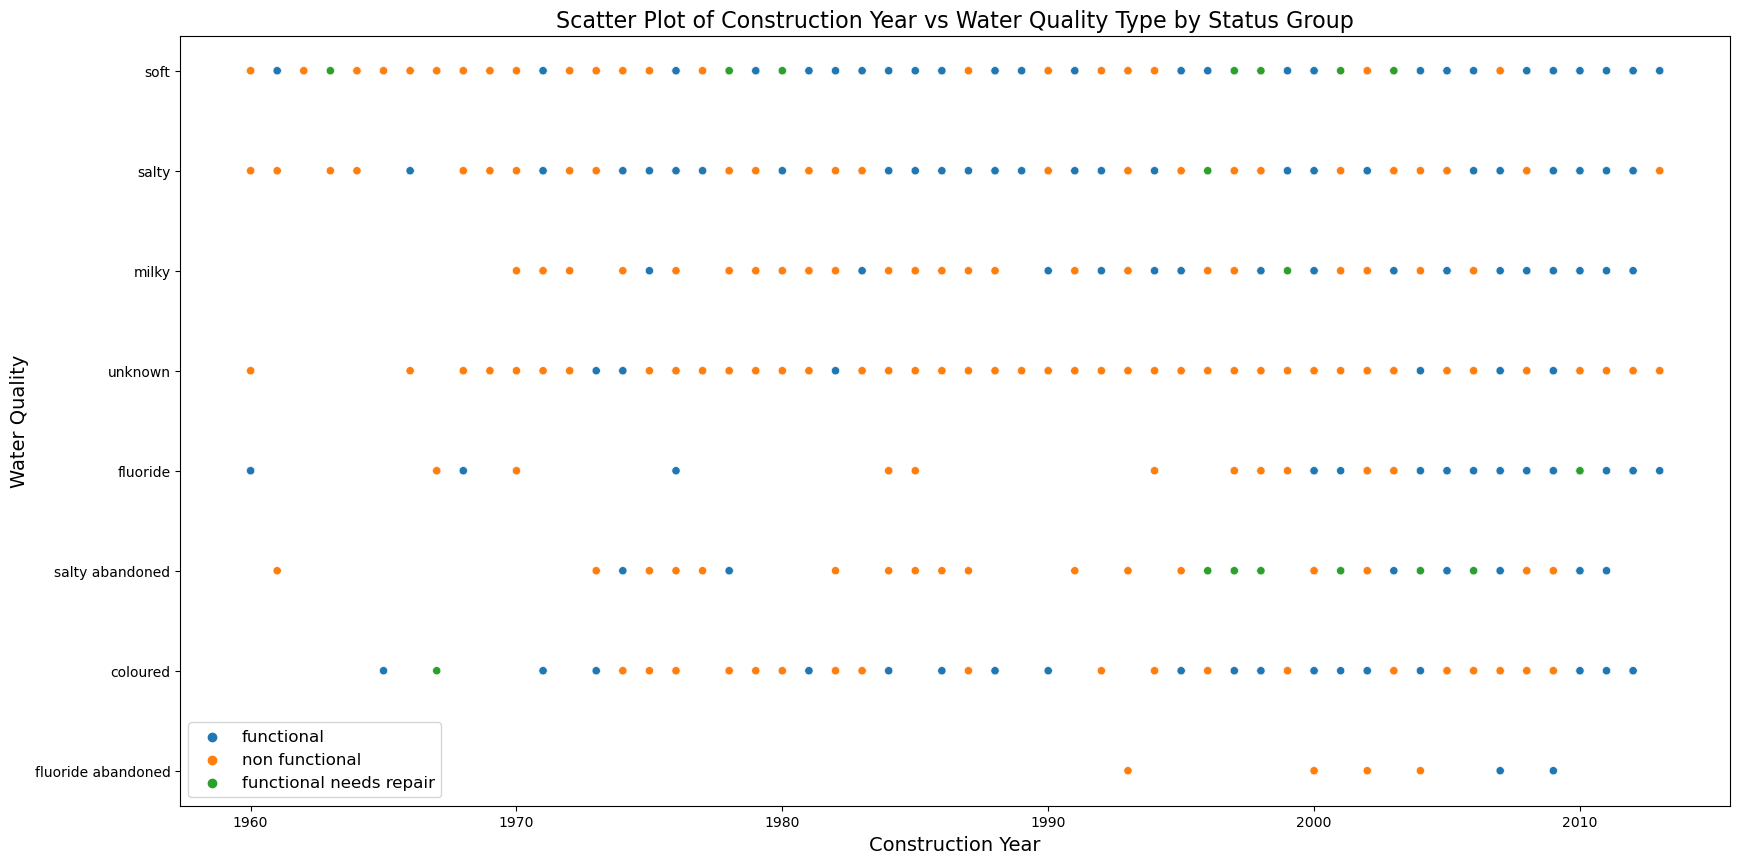

In [26]:
f, ax = plt.subplots(figsize=(20,10))
ax = sns.scatterplot(data=train_df_copy, x='construction_year', y='water_quality', hue='status_group')
ax.set_xlabel('Construction Year', fontsize=14)
ax.set_ylabel('Water Quality', fontsize=14)
ax.set_title('Scatter Plot of Construction Year vs Water Quality Type by Status Group', fontsize=16)
ax.legend(fontsize=12);

f.savefig("Scatter Plot of Construction Year vs Water Quality by Status Group.png");

Majority of the functional wells have soft water and a few have salty water

Majority of the non functional wells quality of water is unknown. This can be because they are not working and the data collectors were not able to tell the quality of water

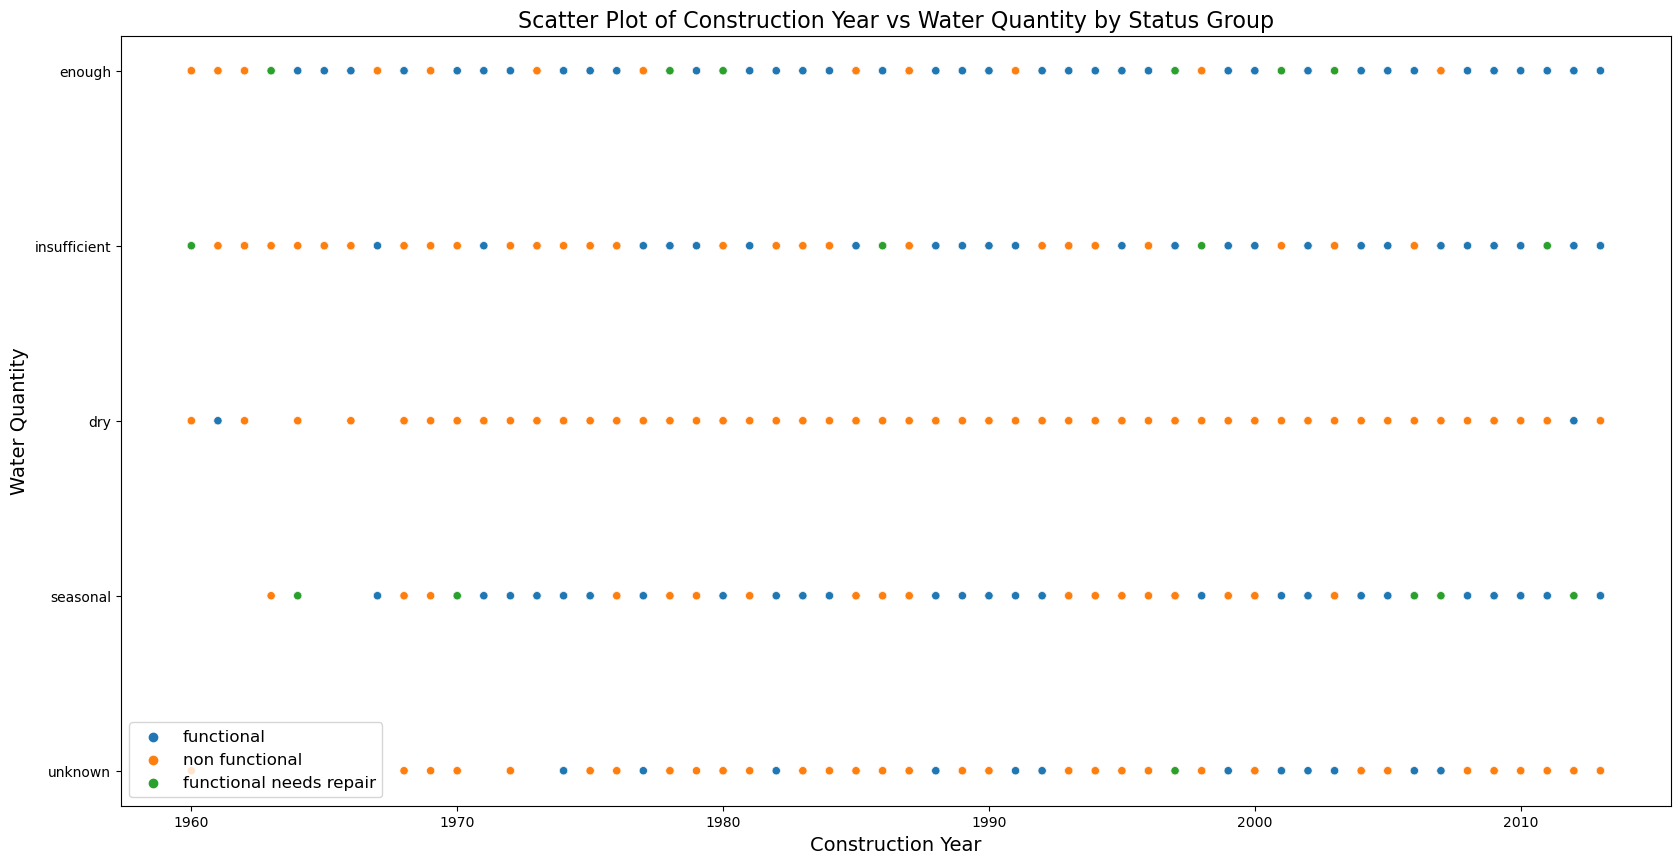

In [27]:
f, ax = plt.subplots(figsize=(20,10))
ax = sns.scatterplot(data=train_df_copy, x='construction_year', y='quantity', hue='status_group')
ax.set_xlabel('Construction Year', fontsize=14)
ax.set_ylabel('Water Quantity', fontsize=14)
ax.set_title('Scatter Plot of Construction Year vs Water Quantity by Status Group', fontsize=16)
ax.legend(fontsize=12);

f.savefig("Scatter Plot of Construction Year vs Water Quantity by Status Group.png");

The quantity of water for most of the functional wells is enough

The quantity of water for most of the non functional wells is dry

The quantity of water for the functional needs repair class is low

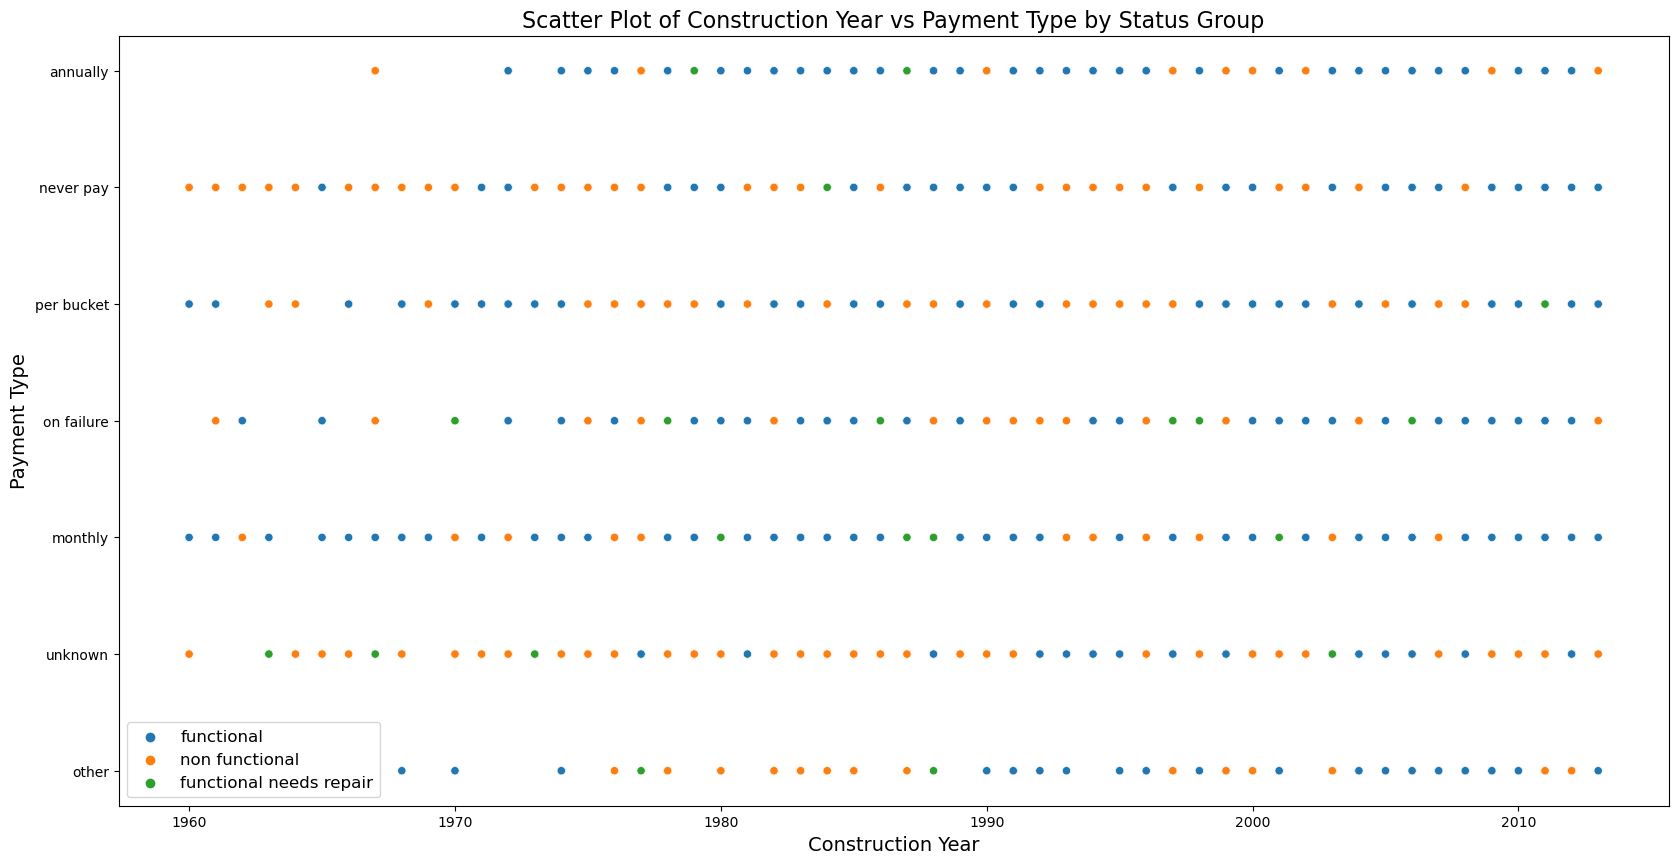

In [28]:
f, ax = plt.subplots(figsize=(20,10))
ax = sns.scatterplot(data=train_df_copy, x='construction_year', y='payment_type', hue='status_group')
ax.set_xlabel('Construction Year', fontsize=14)
ax.set_ylabel('Payment Type', fontsize=14)
ax.set_title('Scatter Plot of Construction Year vs Payment Type by Status Group', fontsize=16)
ax.legend(fontsize=12);

f.savefig("Scatter Plot of Construction Year vs Payment Type by Status Group.png");

The payment type for most of the functional class waterpoints is either monthly, annualy or per bucket

The payment type for the non fuctional class is unknown or never paid

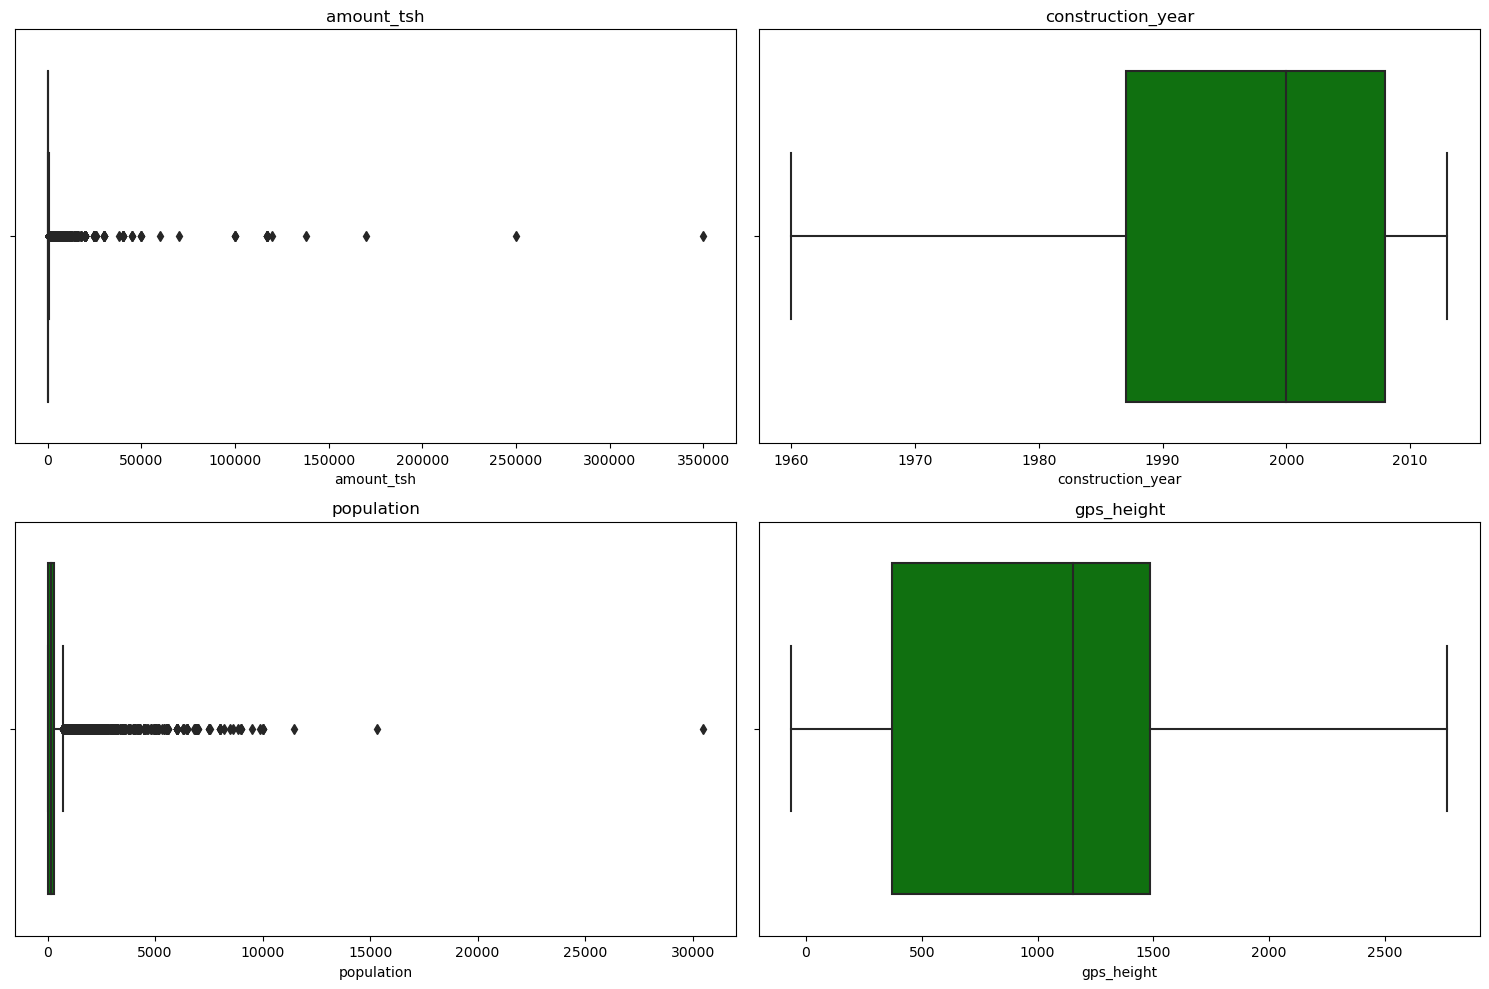

<Figure size 640x480 with 0 Axes>

In [29]:
# Outlier detection
# create a subplot with 4 box plots
numeric_cols = "amount_tsh", "construction_year", "population", "gps_height"

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# loop over the numerical columns and the subplot axis
for i, col in enumerate(numeric_cols[:6]):
    sns.boxplot(x=train_df_copy[col], color="green", ax=axs[i//2][i%2])
    axs[i//2][i%2].set_title(col)

plt.tight_layout()
plt.show();

plt.savefig("Outliers.png");

The amount and population columns have outliers which will not be removed as this will lower the perfomance of the model

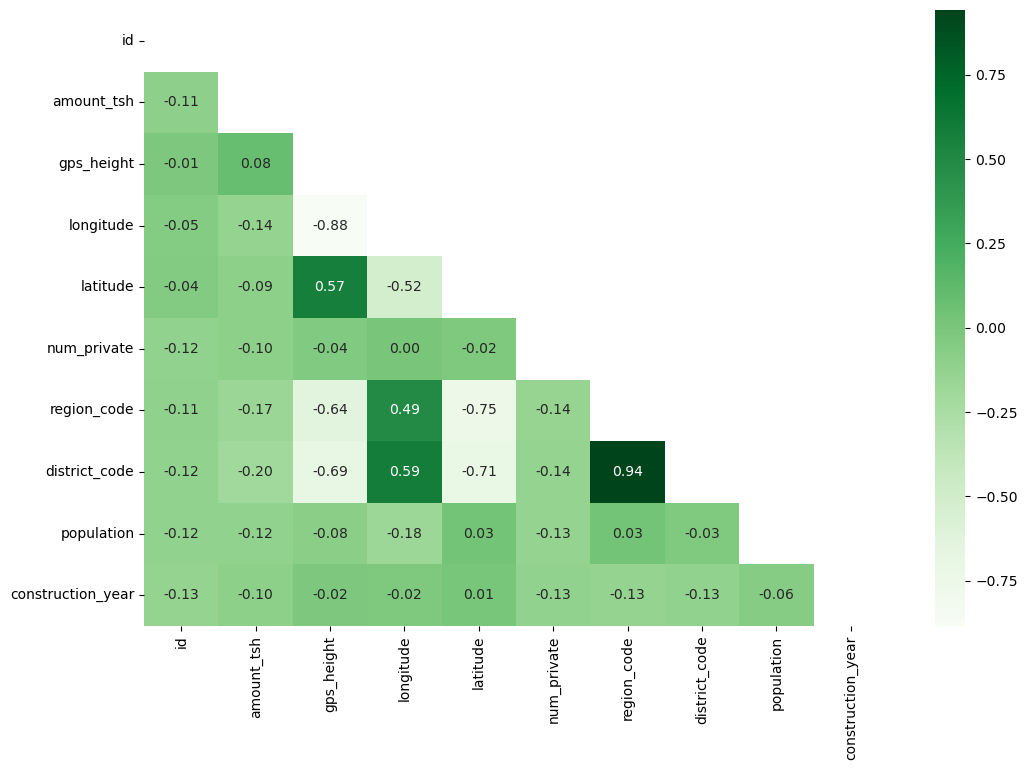

In [30]:
# Compute the correlation matrix
corr_matrix = train_df_copy.corr()

# Show the correlation matrix
# print(corr_matrix)

# Plot the correlation matrix
plt.figure(figsize=(12,8))
mask = np.triu(np.ones_like(corr_matrix.corr(), dtype=bool))
sns.heatmap(corr_matrix.corr(),annot=True,cmap="Greens",fmt=".2f", mask=mask)
plt.show();

f.savefig("Correlation Matrix.png");

## 3. Data Preparation

The data preparation step is the process of cleaning, transforming, and preprocessing the data so that it can be used in building predictive models.

In [31]:
# separate target variable and feature data
train_target = train_df['status_group']
train_features = train_df.drop('status_group', axis=1)

The target variable, train_target, contains the values of the "status_group" column. The target variable is what the machine learning model will attempt to predict.

Train_features contains the values of all columns except for "status_group." It will be used by the machine learning model to make predictions about the target variable.

By separating the target variable and feature data, it is easier to manipulate and pre-process the data before building a machine learning model.

In [32]:
# concatenate train and test features for preprocessing (to prevent data leakage)
features = pd.concat([train_features, test_df], ignore_index=True)

The code concatenates the training and test feature data into a single dataframe, features, to prevent data leakage when pre-processing the data.

Data leakage occurs when information from the test set is used to pre-process the training set, leading to overfitting. By concatenating the train and test features, any pre-processing performed on the combined dataframe will not use information from the test set, preventing data leakage.

### 3.1 Handling Missing Values

In [33]:
# fill missing values in the scheme_name column with None
features['scheme_name'] = features['scheme_name'].fillna(value='None')

features['permit'] = features['permit'].fillna(value='FALSE')

features['public_meeting'] = features['public_meeting'].fillna(value='FALSE')

The first line fills missing values in the scheme_name column with the value "None." This is known as imputation and is a common technique for handling missing values in a dataset. By imputing a value for missing entries, we can ensure that all values in the column are non-missing, which is necessary for building a machine learning model.

The second and third lines fill missing values in the permit and public_meeting columns with the value "FALSE." This is because the data in these columns is binary and missing values are being treated as "False" values.

In [34]:
# handle missing data
imputer = SimpleImputer(strategy='most_frequent')
features = imputer.fit_transform(features)

In [35]:
# Understanding the number of missing values in the clea dataset
print("\nMissing Values in the dataset:")
features = pd.DataFrame(features)
print(features.isnull().sum().sum(), "missing values in the dataset")



Missing Values in the dataset:
0 missing values in the dataset


### 3.2 Feature Selection

In [37]:
features = features.drop(['id','num_private','subvillage','extraction_type','recorded_by','payment','quality_group',
                         'source','waterpoint_type_group', 'scheme_management'], axis=1)

This code performs feature selection by dropping columns from the combined dataframe, features, that are considered to be less important for the machine learning model.

Feature selection is an important step in the machine learning process as it helps to reduce noise, reduce overfitting, and increase the interpretability of the model. By dropping columns that are not considered to be important, the model is forced to rely more heavily on the remaining features, which should lead to improved performance.

In [38]:
features['coordinates'] = features['longitude'].astype(str) + ', ' + features['latitude'].astype(str)

The coordinates column can be used as a feature in a machine learning model if it is believed to be informative. The combination of longitude and latitude values can sometimes capture spatial information about the location of a water pump, which could be important for predicting its status.

In [39]:
# Dealing with Multicollinearity
# Get the list of numerical columns
numeric_cols = features.select_dtypes(include=["float64", "int64"]).columns

# Calculate the correlation matrix
corr_matrix = features[numeric_cols].corr()

# Get the absolute values of the correlation matrix to deal with negative correlations
abs_corr_matrix = abs(corr_matrix)

# Select the upper triangle of the correlation matrix
upper_triangle = np.triu(abs_corr_matrix, k=1)
upper_triangle = pd.DataFrame(upper_triangle)

# Get the indices of the highly correlated features (correlation greater than 0.8)
to_drop = [column for i, column in enumerate(numeric_cols) if any(upper_triangle.iloc[i] > 0.8)]

# Drop the highly correlated features
features = features.drop(to_drop, axis=1)

This code performs feature selection by removing highly correlated numerical features from the features dataframe. The purpose of removing highly correlated features is to eliminate redundant information and improve the performance of the machine learning model. When two features are highly correlated, they contain similar information and adding both to the model can lead to overfitting. By removing one of the correlated features, we can simplify the model and potentially improve its generalization performance.

### 3.3 Encoding Categorical Variables

In [40]:
# encode categorical columns
encoder = LabelEncoder()
categorical_cols = features.select_dtypes(include=['object']).columns
for col in categorical_cols:
    features[col] = features[col].astype(str)
    features[col] = encoder.fit_transform(features[col])


The LabelEncoder is used to encode each categorical column separately.

### 3.4 Scaling

Scaling ensures that all features are on the same scale, which can improve the performance of the model. In this case, the MinMaxScaler method scales the features to a range between 0 and 1

In [41]:
# Scale the features
# create the MinMaxScaler object
scaler = MinMaxScaler()

# fit and transform the features
features = scaler.fit_transform(features)

Separate the preprocessed data in the features dataframe back into the original training and testing sets.

In [42]:
# split the preprocessed data back into train and test
train_features_processed = features[:train_features.shape[0],:]
test_features_processed = features[train_features.shape[0]:,:]


Check the first few rows of the data to make sure it looks as expected.

In [43]:
train_features_processed = pd.DataFrame(train_features_processed)
train_features_processed.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.891500,0.831683,0.268222,0.723703,0.202037,0.708178,0.489843,0.993919,1.000000,0.0,...,0.000000,0.857143,0.4,0.25,0.25,0.888889,1.000000,0.0,0.166667,0.2
1,0.981710,0.000000,0.138484,0.244039,0.205703,0.253217,0.445388,0.163742,0.994374,0.0,...,0.333333,0.857143,0.4,0.50,0.50,0.555556,0.500000,0.5,0.166667,0.2
2,0.363843,0.376238,0.925656,0.431978,0.858656,0.953093,0.776875,0.413934,0.388919,0.0,...,0.833333,0.857143,0.4,0.25,0.25,0.000000,0.166667,0.5,0.333333,0.2
3,0.864133,0.000000,0.962099,0.916784,0.666802,0.862599,0.875859,0.145390,0.996804,0.0,...,0.333333,0.857143,0.4,0.00,0.00,0.333333,0.000000,0.0,0.333333,0.2
4,0.145605,0.000000,0.255102,0.009350,0.024440,0.055210,0.083108,0.052484,0.950266,0.0,...,0.333333,0.857143,0.4,0.75,0.75,0.555556,0.500000,0.5,0.166667,0.2


### 3.5 Class Imbalance

In [44]:
# Check the distribution of the target variable
print("\nDistribution of the target variable:")
print(train_target.value_counts(normalize=True))


Distribution of the target variable:
functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64


About 54.3% of the water pumps in the training data are functional, 38.4% are non-functional, and 7.3% need repairs. This imbalance will be handled at this stage. 

Split the processed training features and target variables into training and testing sets (with a 90-10 split) 

In [45]:
# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(train_features_processed, train_target, test_size=0.1, random_state=0)

Fit a support vector machine (SVM) classifier with cost-sensitive learning to handle class imbalance. The cost-sensitive learning option is set in the class_weight parameter, with the value 'balanced' which adjusts the weight of the classes based on their frequency.

In [46]:
# Initialize the classifier with cost-sensitive learning to handle class imbalance
svc = SVC(class_weight='balanced')

# Fit the classifier to the training data
svc.fit(X_train, y_train)

SVC(class_weight='balanced')

## 4. Modeling

### 4.1 Model Building and Evaluation

### 4.1.1 Model 1: Baseline Model (Logistic Regression)

A baseline machine learning model is built using logistic regression. The model is initialized with random_state set to 0, which sets the random seed to 0 for reproducibility. Then, the model is fit to the training data (X_train and y_train). After that, the model is used to make predictions on the test data (X_test).

The model performance is evaluated by calculating accuracy and F1-score.

In [47]:
# Initialize the model
model_1 = LogisticRegression(random_state=0)

# Fit the model on the training data
model_1.fit(X_train, y_train)

# Predict target values for the test data
y_pred_1 = model_1.predict(X_test)

# Evaluate the model performance
# Calculate accuracy score
accuracy_1 = accuracy_score(y_test, y_pred_1)
f1_score_1 = f1_score(y_test, y_pred_1, average="weighted")
print("Accuracy of Baseline Model (Logistic Regression):", accuracy_1)
print("F1 score of Baseline Model (Logistic Regression):", f1_score_1)

Accuracy of Baseline Model (Logistic Regression): 0.6597643097643098
F1 score of Baseline Model (Logistic Regression): 0.6292155528611343


The accuracy of the baseline model is 0.6598 and the F1-score is 0.6292.

To understand the perfomance of the classifier better, the output of the classification_report function will be used to provide a summary. The report provides the perfomance metrics for each class in the target variable. In this case, there are three classes: "functional", "functional needs repair", and "non functional". The precision, recall, f1-score, and support of each class can be used to understand the performance of the classifier.

In [48]:
report_lr = classification_report(y_test, y_pred_1)
print(report_lr)

                         precision    recall  f1-score   support

             functional       0.66      0.83      0.73      3253
functional needs repair       0.25      0.00      0.00       424
         non functional       0.66      0.54      0.60      2263

               accuracy                           0.66      5940
              macro avg       0.52      0.46      0.44      5940
           weighted avg       0.63      0.66      0.63      5940



The accuracy of the baseline model is 0.66, which means that the model correctly classifies the water pump status 66% of the time. The F1-score of the model is 0.63, which is a weighted average of the precision and recall of the model indicating that the model's performance is not very good, particularly for the "functional needs repair" class.

### 4.1.2 Model 2: Non-Parametric Model (Decision Tree Classifier)

In [49]:
# Initialize the model
model_2 = DecisionTreeClassifier(random_state=0)

# Fit the model on the training data
model_2.fit(X_train, y_train)

# Predict target values for the test data
y_pred_2 = model_2.predict(X_test)

# Evaluate the model performance
# Calculate accuracy score
accuracy_2 = accuracy_score(y_test, y_pred_2)
f1_score_2 = f1_score(y_test, y_pred_2, average="weighted")
print("Accuracy of Nonparametric Model (Decision Tree Classifier):", accuracy_2)
print("F1 score of Nonparametric Model (Decision Tree Classifier):", f1_score_2)

Accuracy of Nonparametric Model (Decision Tree Classifier): 0.7496632996632997
F1 score of Nonparametric Model (Decision Tree Classifier): 0.7508857570860407


The accuracy and F1-score of the decision tree model are better than the logistic regression model. The accuracy of the decision tree model is 0.7496 compared to 0.6598 for the logistic regression model and the F1-score of the decision tree model is 0.7509 compared to 0.6292 for the logistic regression model.

In [50]:
report_dt = classification_report(y_test, y_pred_2)
print(report_dt)

                         precision    recall  f1-score   support

             functional       0.81      0.79      0.80      3253
functional needs repair       0.35      0.37      0.36       424
         non functional       0.75      0.76      0.76      2263

               accuracy                           0.75      5940
              macro avg       0.64      0.64      0.64      5940
           weighted avg       0.75      0.75      0.75      5940



The accuracy of the model is 0.75, which indicates that the model is correctly predicting the class for 75% of the pumps in the test data.

Overall, the f1-score and accuracy metrics suggest that the decision tree model is performing better than the logistic regression model in terms of correctly predicting the class of pumps, especially for the 'functional' and 'non-functional' classes.

The f1-score for the 'functional needs repair' class is 0.36, indicating that the model is not performing very well in correctly predicting pumps that need repair.

### 4.1.3 Model 3: Non-Parametric Model 2 (K-Nearest Neighbors)

In [51]:
# Initialize the model
model_3 = KNeighborsClassifier(n_neighbors=5)

# Fit the model on the training data
model_3.fit(X_train, y_train)

# Predict target values for the test data
y_pred_3 = model_3.predict(X_test)

# Evaluate the model performance
# Calculate accuracy score
accuracy_3 = accuracy_score(y_test, y_pred_3)
f1_score_3 = f1_score(y_test, y_pred_3, average="weighted")
print("Accuracy of KNN Model (K Nearest Neighbors Classifier):", accuracy_3)
print("F1 score of KNN Model (K Nearest Neighbors Classifier):", f1_score_3)

Accuracy of KNN Model (K Nearest Neighbors Classifier): 0.7550505050505051
F1 score of KNN Model (K Nearest Neighbors Classifier): 0.7466210152563165


The accuracy of this model is 0.7551 and the F1 score of the model is 0.7466

The accuracy and F1 score of the KNN model are slightly better than the accuracy and F1 score of the Decision Tree Classifier model. However, the difference is small, so it would be necessary to perform further analysis or try other models.

In [52]:
report_knn = classification_report(y_test, y_pred_3)
print(report_knn)

                         precision    recall  f1-score   support

             functional       0.76      0.86      0.81      3253
functional needs repair       0.44      0.26      0.33       424
         non functional       0.79      0.69      0.74      2263

               accuracy                           0.76      5940
              macro avg       0.66      0.61      0.62      5940
           weighted avg       0.75      0.76      0.75      5940



The weighted average precision, recall, and f1-score of the model are 0.75, 0.76, and 0.75, respectively. The weighted average takes into account the imbalance of the classes in the test set.

If accuracy is the only concern, then it appears that the KNN  model (with precision, recall, f1-score) has a higher accuracy of 0.76 compared to the accuracy of 0.75 for the decision tree model. However, it's also important to consider the precision, recall, and f1-score for each class to have a more complete understanding of the performance of the model.

In this case, the new model has a higher precision and f1-score for the "functional" class, but a lower precision and f1-score for the "functional needs repair" class. On the other hand, the decision tree model has a higher recall and f1-score for the "functional needs repair" class, but a lower recall and f1-score for the "functional" class.

### 4.1.4 Model 4: Ensemble Model (Gradient Boosting)

Gradient Boosting Classifier is a type of Boosting algorithm that is used for classification problems. It is an ensemble learning method that builds an additive model by combining multiple weak models.

In [53]:
# Model Building - More Complex Model (Gradient Boosting Classifier)
# Initialize the model
model_4 = GradientBoostingClassifier(random_state=0)

# Fit the model on the training data
model_4.fit(X_train, y_train)

# Predict target values for the test data
y_pred_4 = model_4.predict(X_test)

# Evaluate the model performance
# Calculate accuracy score
accuracy_4 = accuracy_score(y_test, y_pred_4)
f1_score_4 = f1_score(y_test, y_pred_4, average="weighted")
print("Accuracy of Gradient Boosting Model (Gradient Boosting Classifier):", accuracy_4)
print("F1 score of Gradient Boosting Model (Gradient Boosting Classifier):", f1_score_4)

Accuracy of Gradient Boosting Model (Gradient Boosting Classifier): 0.762962962962963
F1 score of Gradient Boosting Model (Gradient Boosting Classifier): 0.7432088728315078


The accuracy of the Gradient Boosting Model is 0.7630 and the F1 score is 0.7432

The accuracy of the gradient boosting model and the KNN model is almost the same, however, the F1 score of the KNN Model is slightly higher than that of the Gradient Boosting Model. This suggests that the KNN Model might perform better in terms of precision and recall for the classes. However, this difference is relatively small

In [54]:
report_gbm = classification_report(y_test, y_pred_4)
print(report_gbm)

                         precision    recall  f1-score   support

             functional       0.73      0.93      0.82      3253
functional needs repair       0.67      0.15      0.25       424
         non functional       0.84      0.64      0.73      2263

               accuracy                           0.76      5940
              macro avg       0.75      0.57      0.60      5940
           weighted avg       0.77      0.76      0.74      5940



The output for the Gradient Boosting model (f1-score and accuracy) shows that it has performed similarly to the KNN model. In terms of accuracy, both the models have an accuracy of around 0.75. The weighted average F1 score of the Gradient Boosting model is slightly lower than the weighted average F1 score of the KNN model, but both are around 0.73 to 0.75. The precision, recall, and f1-score of each class also seem to be similar for both the models. It is difficult to determine which model is better as both models have performed similarly.

### 4.1.5 Model 5: Ensemble Model 2 (Random Forest)

Random Forest Classifier is a type of Decision Tree algorithm that creates multiple decision trees and combines their results to make a final prediction.

In [55]:
# Model Building - More Complex Model (Random Forest Classifier)
# Initialize the model
model_5 = RandomForestClassifier(n_estimators=100, random_state=0)

# Fit the model on the training data
model_5.fit(X_train, y_train)

# Predict target values for the test data
y_pred_5 = model_5.predict(X_test)

# Evaluate the model performance
# Calculate accuracy score
accuracy_5 = accuracy_score(y_test, y_pred_5)
f1_score_5 = f1_score(y_test, y_pred_5, average="weighted")
print("Accuracy of More Complex Model (Random Forest Classifier):", accuracy_5)
print("F1 score of More Complex Model (Random Forest Classifier):", f1_score_5)

Accuracy of More Complex Model (Random Forest Classifier): 0.8185185185185185
F1 score of More Complex Model (Random Forest Classifier): 0.8110428669865821


The Random Forest Classifier model has an accuracy of 0.8185 and an F1 score of 0.8110

In terms of accuracy, the random forest classifier has a higher accuracy score of 0.82 compared to the other 4 models, which had accuracy scores of 0.76 (gradient boosting),    0.76 (KNN), 0.75 (decision tree), and 0.66 (logistic regression).

In terms of the F1 score, the random forest classifier has a higher F1 score of 0.81 compared to the other 4 models, which had F1 scores of 0.74 (gradient boosting), 0.75 (KNN), 0.75 (decision tree), and 0.63 (logistic regression).

Based on these results, the random forest classifier appears to be performing the best among the 5 models.

In [56]:
report_rf = classification_report(y_test, y_pred_5)
print(report_rf)

                         precision    recall  f1-score   support

             functional       0.81      0.90      0.85      3253
functional needs repair       0.61      0.33      0.43       424
         non functional       0.86      0.79      0.82      2263

               accuracy                           0.82      5940
              macro avg       0.76      0.67      0.70      5940
           weighted avg       0.81      0.82      0.81      5940



The accuracy of the Random Forest Classifier model is 82%, which is higher than the accuracy scores of the other 4 models. The F1 score is also higher compared to the other models. The precision, recall, and f1-score for all the classes are also higher in comparison to the other models.

This means that the Random Forest Classifier is able to make correct predictions for the majority of the test data, and also has a good balance between precision and recall for all the classes.

### 4.2 Model Selection

In [57]:
if accuracy_1 > accuracy_2 and accuracy_1 > accuracy_3 and accuracy_1 > accuracy_4 and accuracy_1 > accuracy_5:
    best_model = model_1
elif accuracy_2 > accuracy_3 and accuracy_2 > accuracy_4 and accuracy_2 > accuracy_5:
    best_model = model_2
elif accuracy_3 > accuracy_4 and accuracy_3 > accuracy_5:
    best_model = model_3
elif accuracy_4 > accuracy_5:
    best_model = model_4
else:
    best_model = model_5


print("Best Model:", best_model)

Best Model: RandomForestClassifier(random_state=0)


Based on the accuracy scores, the Random Forest Classifier has been determined to be the best model out of the five models used.

### 4.3 Hyperparameter Tuning using Randomized Search Cross Validation

Hyperparameter tuning and cross-validation are important steps in the machine learning model building process because they help to optimize the model performance and prevent overfitting or underfitting.
The randomized search cross-validation helps to perform an efficient search for the optimal hyperparameters and cross-validate the model, which leads to better model performance and robustness.

In [58]:
# Define the parameter space for the random search,
# These hyperparameters control the complexity of the model and affect its performance.
param_grid = {'n_estimators': [10, 50, 100, 200, 500],
              'max_depth': [5, 10, 15, 20, 25, None],
              'min_samples_split': [2, 5, 10, 20],
              'min_samples_leaf': [1, 2, 4, 8]}

# Initialize the random forest classifier
rf = RandomForestClassifier()

# Initialize the randomized search 
# (n_iter (number of iterations), cv (number of folds for cross-validation),random_state,n_jobs set for control& optimization.)
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid,
                                   n_iter=100, cv=5, random_state=0, n_jobs=-1)

# Fit the randomized search on the training data
random_search.fit(X_train, y_train)

# Predict target values for the test data
y_pred_rs = random_search.predict(X_test)

# Evaluate the model performance
# Calculate accuracy score
accuracy_rs = accuracy_score(y_test, y_pred_rs)
f1_score_rs = f1_score(y_test, y_pred_rs, average="weighted")
print("Accuracy of Randomized Search Model (Random Forest Classifier):", accuracy_rs)
print("F1 score of Randomized Search Model (Random Forest Classifier):", f1_score_rs)

Accuracy of Randomized Search Model (Random Forest Classifier): 0.822053872053872
F1 score of Randomized Search Model (Random Forest Classifier): 0.8135390112805633


The accuracy of the model is 0.8221, which means that the model correctly predicted the class label of 82.2% of the test data instances.

The F1 score is 0.8135. A higher F1 score indicates a better performance of the model.

This tuned model has better perfomance metrics and hence a good model.

In [59]:
report_rs = classification_report(y_test, y_pred_rs)
print(report_rs)

                         precision    recall  f1-score   support

             functional       0.81      0.92      0.86      3253
functional needs repair       0.68      0.33      0.44       424
         non functional       0.87      0.78      0.82      2263

               accuracy                           0.82      5940
              macro avg       0.78      0.67      0.71      5940
           weighted avg       0.82      0.82      0.81      5940



From the output, the precision for the "functional" class is 0.81, meaning that 81% of the positive predictions made by the model were correct. The recall for the "functional" class is 0.92, meaning that 92% of the actual positive instances were correctly detected by the model. The f1-score for the "functional" class is 0.86, which is a weighted average of the precision and recall.

Similarly, the precision, recall, and f1-score for the other two classes, "functional needs repair" and "non functional". The overall accuracy of the model is 0.82, meaning that the model correctly predicted the class label of 82% of the test data instances. The macro avg and weighted avg are the average of the individual class-wise metrics and give an overall summary of the model performance.

This evaluation of the random forest classifier shows that the model is performing well with an accuracy of 0.82, however, there is room for improvement in terms of precision, recall, and f1-score for the functional needs repair class.

This is the final model and it will be used to evaluate the test dataset

## 5. External Validation

External validation is the process of evaluating a model's performance using data that was not used during the training phase. This is usually done to get a better understanding of how well the model generalizes to new and unseen data. This can be achieved through the separate test set provided.

Generate predictions for the target values of the "test_features_processed" data using the optimized random forest classifier obtained from the random search. 

The model uses the best hyperparameters found in the randomized search to generate these predictions. The "test_predictions" variable will contain the predicted target values, which can then be compared with the actual target values to evaluate the model performance.

In [60]:
# Create the predictions for the test dataset
test_predictions = random_search.predict(test_features_processed)

Create a submission DataFrame which will store the test results in a format suitable for submission to the "Pump it Up: Data Mining the Water Table" competition hosted by DrivenData. The DataFrame is created from the test_df dataframe, which is assumed to contain the test data, and the test_predictions array, which is assumed to contain the predicted class labels for the test instances. The DataFrame has two columns, "id" and "status_group", where "id" is taken from the "id" column of the test_df dataframe and "status_group" is the predicted class label for each test instance.

In [61]:
# Create submission DataFrame
submission = pd.DataFrame({"id": test_df["id"], "status_group": test_predictions})

In [62]:
# Check the shape of the submission dataframe
submission.shape

(14850, 2)

The dataframe has 14358 rows (test instances) and 2 columns (id and status_group).

In [63]:
# Show the sample head
submission.sample(5)

,id,status_group
5018,31557,functional
4103,18921,functional
1881,33791,functional
7560,32334,functional
12611,36698,functional


In [64]:
# Save the DataFrame to a CSV file
submission.to_csv('Submission_1.csv', index=False)

The 'to_csv' method is then used to save this DataFrame as a CSV file with the name 'Submission_1.csv', and the 'index' argument is set to 'False' to ensure that the DataFrame index is not included in the output file.

The classification rate for this after making the submission is 0.8242 which put the redictions made by the model at position 1499 out of 14460 other entries

## 6. Challenging the Solution

1. While the model has a high accuracy of 0.82, the precision and recall scores for the 'functional needs repair' class are lower compared to the other two classes. This could indicate that the model is not accurately predicting instances of this class and could potentially lead to misclassification of important information.

2. The imbalance in the number of instances for each class in the training data could lead to the model overfitting to the majority class and not accurately predicting instances of the minority class. To address these challenges, further refinement of the model, such as using methods to balance the class distribution in the training data, or using different algorithms, could be considered.

3. Random Search CV is computationally expensive and therefore not the most suitable model for large datasets.

## 7. Conclusion and Recommendations

### Conclusions

The model could be further improved by incorporating more data especially for the functional needs repair class to handle imbalance for the classes

### Recommendations

1. The Tanzania Ministry of Water should invest in better waterpoint types such communal standpipes and hand pumps
2. The Tanzania Ministry of Water should ensure that the extraction type for the wells is mostly through gravity and handpump
3. The Tanzania Ministry of Water should ensure that the gps height(altitude of the well) for most waterpoints is high enough
4. The Tanzania Ministry of Water should also ensure that the people using the waterpoints pay either monthly, annualy or per bucket to ensure that the wells are well maintained